In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.load_model('second-ml-model.model')
print(clf_xgb)

In [ ]:
1. Prepare the Data for LSTM Training
Since the LSTM model requires sequential input, you need to format the low-confidence packet data correctly.

Steps:
Extract the uncertain samples from the dataset

Get the features and labels of the packets that were uncertain in XGBoost classification.

Normalize the feature values

LSTMs perform better when the input values are normalized.

Reshape the dataset for LSTM input

Convert the feature matrix into a 3D format required by LSTMs:

(samples,time_steps,features)
If the data is not inherently sequential, you can reshape it with time_steps = 1.

2. Define the LSTM Model
You'll create an LSTM-based model for classification.

Model Architecture:
Input layer: Takes in the network features.

LSTM layers: Extract temporal patterns in network traffic data.

Dense layers: Fully connected layers for final classification.

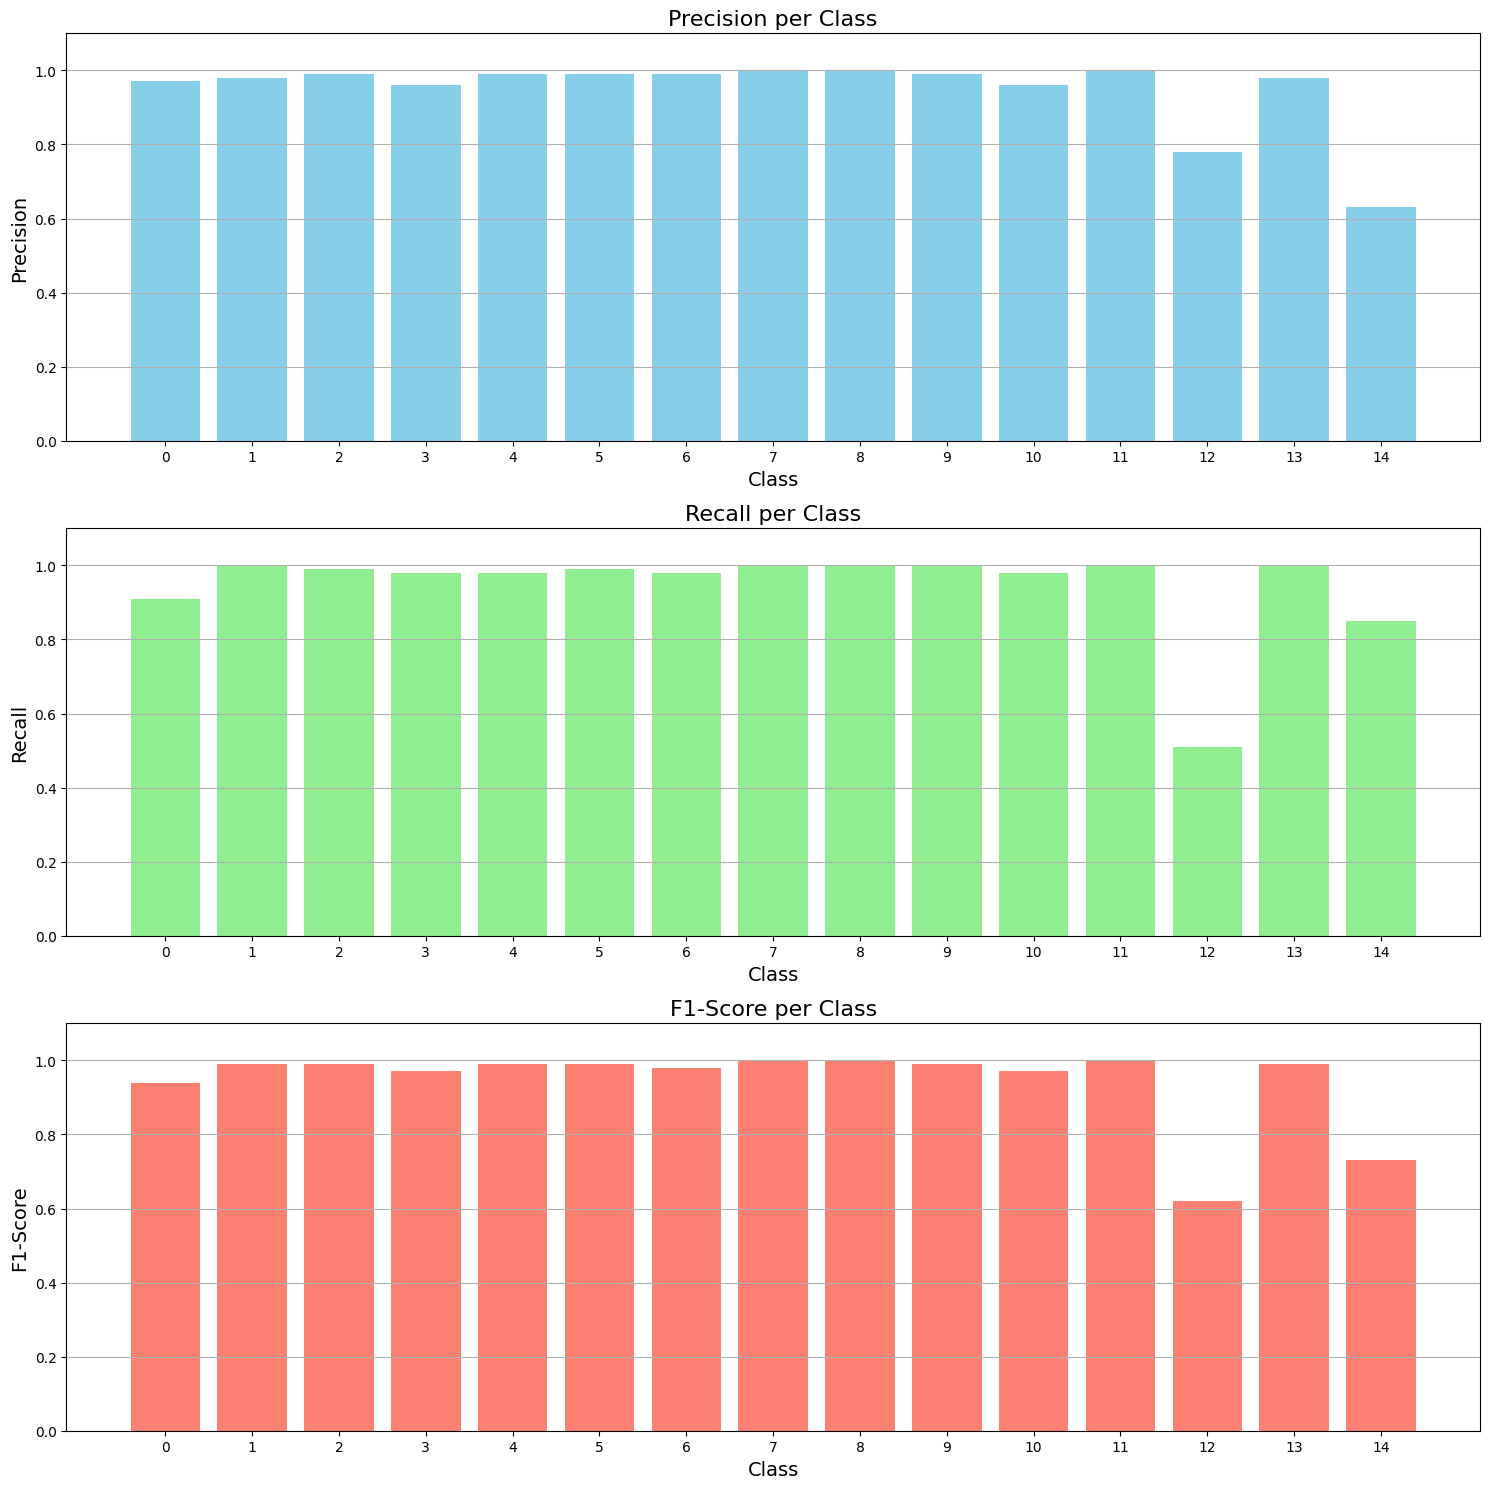

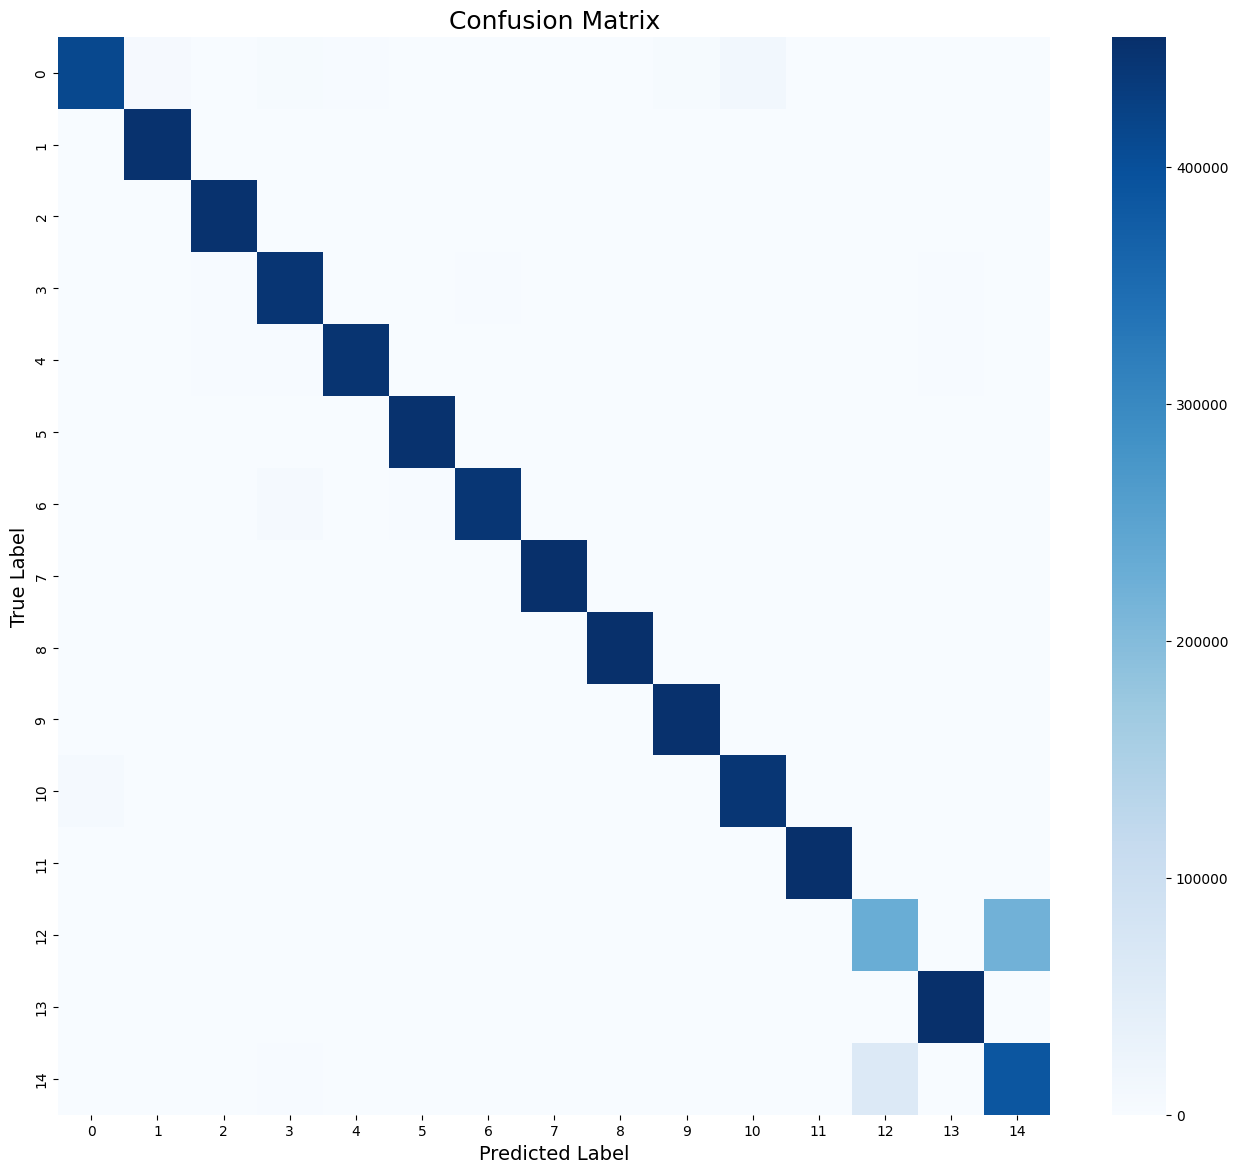

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Labels for classes (you can replace with actual class names if available)
classes = list(range(15))

# Metrics from your report
precision = [0.97, 0.98, 0.99, 0.96, 0.99, 0.99, 0.99, 1.00, 1.00, 0.99, 0.96, 1.00, 0.78, 0.98, 0.63]
recall    = [0.91, 1.00, 0.99, 0.98, 0.98, 0.99, 0.98, 1.00, 1.00, 1.00, 0.98, 1.00, 0.51, 1.00, 0.85]
f1_score  = [0.94, 0.99, 0.99, 0.97, 0.99, 0.99, 0.98, 1.00, 1.00, 0.99, 0.97, 1.00, 0.62, 0.99, 0.73]

# Plotting the bar plots
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
metrics = {'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
colors = ['skyblue', 'lightgreen', 'salmon']

for idx, (metric_name, metric_values) in enumerate(metrics.items()):
    axs[idx].bar(classes, metric_values, color=colors[idx])
    axs[idx].set_title(f'{metric_name} per Class', fontsize=16)
    axs[idx].set_xlabel('Class', fontsize=14)
    axs[idx].set_ylabel(metric_name, fontsize=14)
    axs[idx].set_ylim(0, 1.1)
    axs[idx].grid(axis='y')
    axs[idx].set_xticks(classes)

plt.tight_layout()
plt.show()

# Confusion matrix
conf_matrix = np.array([
 [413245, 5836, 810, 5060, 3070, 855, 1384, 336, 4, 4470, 15789, 167, 1109, 1083, 1293],
 [407, 451513, 0, 0, 0, 0, 0, 0, 0, 0, 1269, 0, 0, 0, 0],
 [363, 1, 450791, 1665, 313, 22, 1, 8, 0, 13, 0, 0, 0, 0, 0],
 [563, 0, 2332, 445698, 156, 338, 2084, 0, 0, 30, 0, 0, 0, 3481, 20],
 [842, 0, 2264, 2370, 446639, 1, 395, 5, 0, 0, 0, 0, 1, 1795, 2],
 [619, 0, 280, 976, 10, 451010, 1405, 0, 0, 0, 0, 5, 119, 43, 139],
 [889, 0, 150, 7455, 27, 1889, 442879, 0, 0, 0, 0, 1, 95, 3, 265],
 [27, 0, 0, 0, 0, 0, 2, 454085, 0, 0, 0, 0, 21, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 455097, 0, 0, 0, 0, 0, 0],
 [725, 0, 0, 0, 0, 0, 0, 0, 0, 452932, 0, 0, 0, 0, 0],
 [7941, 1529, 8, 101, 188, 0, 218, 0, 0, 1, 443810, 0, 12, 0, 23],
 [100, 0, 0, 0, 170, 0, 0, 0, 0, 0, 96, 454412, 36, 0, 0],
 [719, 0, 0, 791, 0, 0, 16, 0, 0, 0, 0, 38, 230348, 782, 221925],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 216, 454289, 0],
 [583, 0, 0, 2562, 0, 0, 0, 0, 0, 0, 0, 0, 62485, 551, 388968]
])

# Plot confusion matrix heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()


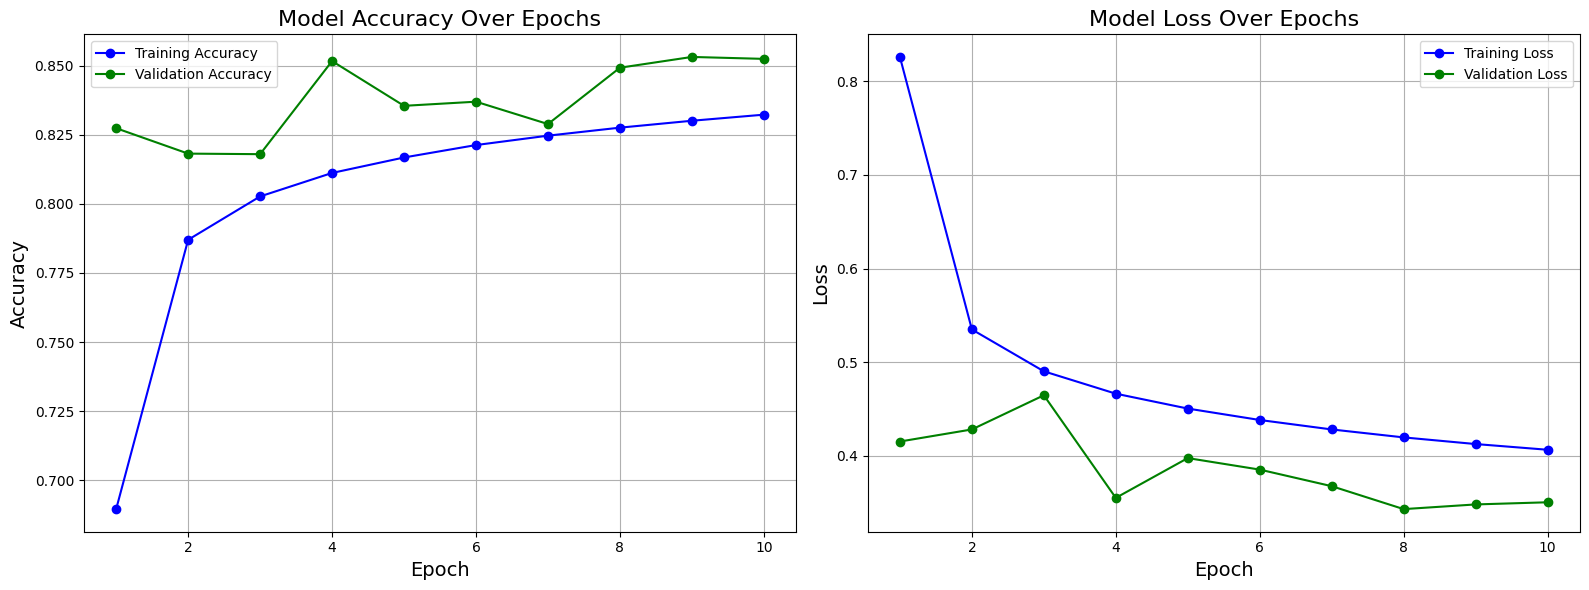

In [2]:
import matplotlib.pyplot as plt

# Data from your logs
epochs = list(range(1, 11))

accuracy = [0.6895, 0.7870, 0.8027, 0.8112, 0.8168, 0.8213, 0.8247, 0.8276, 0.8301, 0.8323]
val_accuracy = [0.8274, 0.8182, 0.8180, 0.8517, 0.8355, 0.8370, 0.8289, 0.8493, 0.8532, 0.8525]

loss = [0.8260, 0.5349, 0.4902, 0.4663, 0.4504, 0.4382, 0.4281, 0.4196, 0.4125, 0.4064]
val_loss = [0.4152, 0.4281, 0.4646, 0.3550, 0.3975, 0.3852, 0.3675, 0.3430, 0.3480, 0.3503]

# Plotting
plt.figure(figsize=(16, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g-o', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'g-o', label='Validation Loss')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


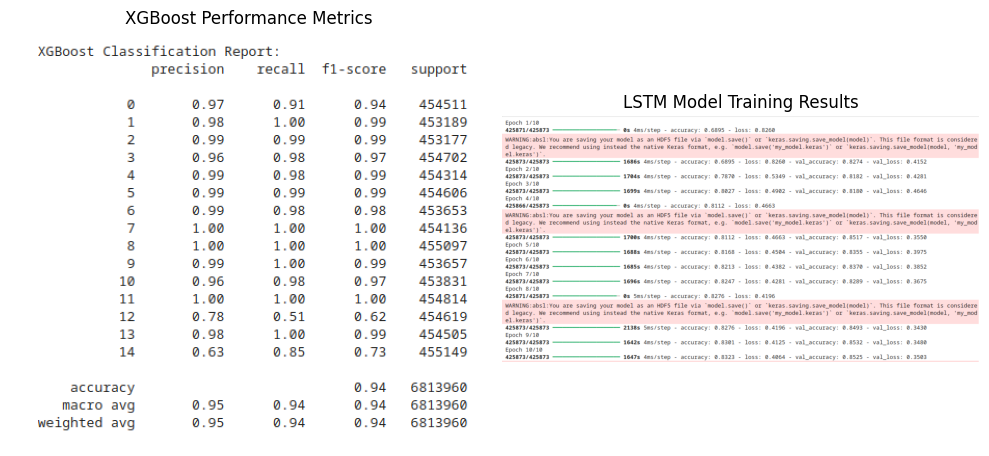

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the two images
img1 = mpimg.imread('testing/xgboost.png')  # Replace with your actual file name
img2 = mpimg.imread('testing/lstm.png') # Replace with your actual file name

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot the first image
axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes
axs[0].set_title('XGBoost Performance Metrics')

# Plot the second image
axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes
axs[1].set_title('LSTM Model Training Results')

# Display the images
plt.tight_layout()
plt.show()